In [2]:
%matplotlib inline

import pandas as pd
from matplotlib import pyplot as plt
from seaborn import distplot
from tqdm import tqdm

from scipy.stats import gamma
import numpy as np

import warnings
warnings.filterwarnings('ignore')

### Объединим файлы в один, используя только колонки "user_id (~uid)" и "level".

In [3]:
### Оставляем только максимальный уровень для каждого пользователя

df = pd.read_csv('clear_df_0.csv', usecols = [1,3], nrows = 1)

for i in tqdm(range(0, 10)):
    df_part = pd.read_csv('clear_df_'+str(i)+'.csv', usecols = [1,3])
    df_part.sort_values(by = 'level', ascending = False, inplace=True)
    df_part.drop_duplicates('user_id', inplace = True)
    
    df = pd.concat([df, df_part], ignore_index=True)
    df.sort_values(by = 'level', ascending = False, inplace=True)
    df.drop_duplicates('user_id', inplace = True)

100%|██████████| 10/10 [01:49<00:00, 11.13s/it]      | 1/10 [00:11<01:39, 11.02s/it]


### Построим распределение пользователей по уровням

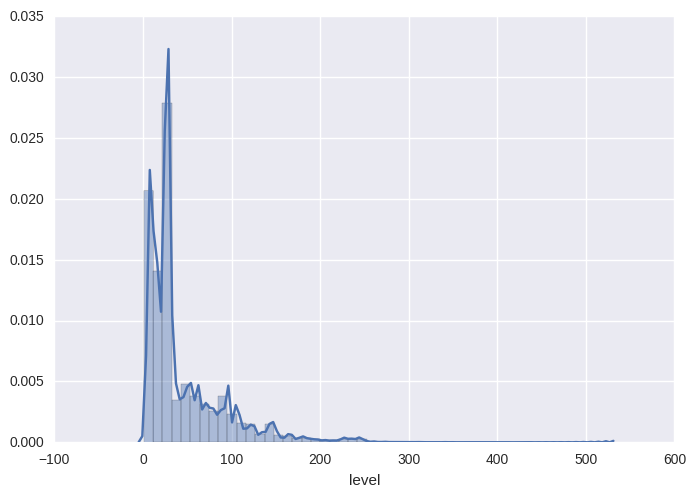

In [4]:
distplot(df['level'], kde=True)
plt.show()

### Отредактируем и добавим гамма-распределение (с вручную подобранными параметрами)

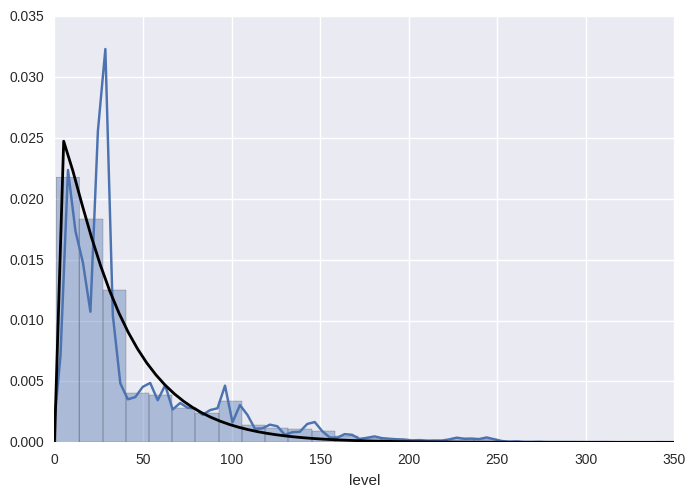

In [69]:
distplot(df['level'], bins = 40, hist = True, kde=True)

rv = gamma(1.1, scale = 0.3)
x = np.linspace(0, len(set(df['level'])), 100)
plt.plot(x, rv.pdf(x/100)/100, 'k-', lw=2, label='frozen pdf')

plt.xlim(0,350)
plt.show()